# Algoritmo Minimax

O Minimax é um algoritmo utilizado principalmente em jogos de dois jogadores (como xadrez, jogo da velha, damas) para decidir o melhor movimento. Ele simula todos os movimentos possíveis no futuro e assume que o oponente jogará da melhor forma possível para dificultar sua vitória.

## Árvore de Decisão no Minimax

O Minimax constrói uma árvore onde cada nó representa um estado do jogo. A raiz da árvore é o estado atual do jogo, e cada filho representa uma jogada possível. O algoritmo percorre essa árvore até estados finais (vitória, derrota ou empate) e avalia cada estado final usando uma função de utilidade (ou função de avaliação).

## Estratégia de Maximizar e Minimizar

- **Jogador Max:** Tenta maximizar o valor da função de utilidade (buscar a melhor jogada possível).
- **Jogador Min:** Tenta minimizar o valor da função de utilidade (assumimos que o oponente joga perfeitamente para nos prejudicar).

O algoritmo alterna entre esses dois comportamentos a cada nível da árvore.

## Aplicações do Minimax

- Jogos de tabuleiro como **xadrez**, **jogo da velha**, **gamão**.
- Jogos de cartas competitivos.
- Qualquer problema de decisão onde há competição entre duas partes.

## Complexidade do Minimax

- **Complexidade de Tempo:** O número de nós da árvore é `O(b^d)`, onde:
  - `b` é o fator de ramificação (número de jogadas possíveis em cada estado);
  - `d` é a profundidade máxima da árvore.

- **Complexidade de Espaço:** Depende da implementação:
  - Se for recursiva e em profundidade (`depth-first`), a complexidade de espaço é `O(d)`.

Por isso, o Minimax puro é inviável para jogos complexos como xadrez, a não ser que limites de profundidade sejam impostos.

## Melhorias: Poda Alfa-Beta

A **poda alfa-beta** é uma técnica que otimiza o Minimax ignorando ramos da árvore que não precisam ser explorados porque já sabemos que não serão escolhidos.

Isso reduz drasticamente o número de nós visitados, mantendo o mesmo resultado final.

- **Alfa (α):** Melhor valor (mais alto) que o jogador Max pode garantir.
- **Beta (β):** Melhor valor (mais baixo) que o jogador Min pode garantir.

Sempre que `beta <= alpha`, podemos podar o restante dos nós filhos.

# Conclusão

O algoritmo Minimax, apesar de simples conceitualmente, é extremamente poderoso para jogos de soma zero de dois jogadores. Sua principal limitação é o custo computacional, que pode ser mitigado com técnicas como poda alfa-beta.

Compreender Minimax é fundamental para trabalhar com inteligência artificial em jogos e em diversas situações de decisão estratégica.

# Bibliotecas

In [1]:
#library para plot do grafo
import networkx as nx
#layout tipo arvore
from networkx.drawing.nx_pydot import graphviz_layout

#library para plot do grafo
import matplotlib.pyplot as plt

#biblioteca random
import random

## Exercício 1:

Gerar grafos aleatórios com branching factor b e profundidade d com valor para os elementos da sua base aleatórios de -10 até 10.

a) Para um dado depth factor `d` e para um Branching factor `b`, gere um codigo em python que produza um grafo, representando-o no formato lista de tuplas.

Ex: `[(1,2),(1,4), (4,5)....]`

Para o caso acima o nó 1 tem uma ligação com o nó dois e 4. O nó 4 tem uma ligação com o nó 5.

In [2]:
#funcao gera grafo
def generate_tree_graph(depth, branching_factor):
  #cria a lista de nomes de nós a partirt do b e do d
  list_nodes = sorted(list(range(sum([branching_factor**x for x in range(depth+1)]))),reverse=True)

  #lista das tuplas
  graph = []

  #input: d do grafo e b do grafo
  #output: lista de tuplas com nós numericos.

  #funcao recursiva
  def generate_edges(parent, current_depth,graph):
    #condiçao de saida da recursao
    #ele vai criando nós até que chegue no d esperado
    if current_depth == depth:
      return
    #para cada nó criado ele vai criar filhos com base no b
    for i in range(1, branching_factor + 1):

      # cria o nome do child
      child = list_nodes.pop(-1)
      #faz append da ligacao
      graph.append((parent, child))
      #gera um novo edge
      generate_edges(child, current_depth + 1,graph)

  #cria o primeiro nó de nome 1
  generate_edges(list_nodes.pop(-1), 0,graph)

  return graph

# Exemplo de uso:
depth = 3
branching_factor = 2
tree_graph = generate_tree_graph(depth, branching_factor)
print(tree_graph)


[(0, 1), (1, 2), (2, 3), (2, 4), (1, 5), (5, 6), (5, 7), (0, 8), (8, 9), (9, 10), (9, 11), (8, 12), (12, 13), (12, 14)]


b) Em seguinda atribua um valor (utility) ou um valor para os nós na base do grafo. Use um dicionário `labels_dic` para faze-lo. Comece aqui a trabalhar com a biblioteca `networkx` ela é especializada em grafos. (Dica: pesquise o método `.degree` de um grafo)

Ex: `{1:'', 2:'', 9:'',...}`

In [3]:
#cria o node
G = nx.DiGraph()

#insere os nós e os edges com base no grafo gerado acima
G.add_edges_from(tree_graph)
#cria o dicionário
labels_dic = {node:random.randint(-10, 10) if G.degree[node]==1 else None for node in G}
# labels_dic = {node:random.randint(-10, 10) for node in G}
# labels_dic


c) Agora vamos tentar imprimir o que gerou. Também faz parte tentar receber funções de outros programadores e tentar atender os parametros de entrada. Utilizando a funcao dada abaixo atenda os requisitos do input e veja o que acontece.

Nodes: [(0, {'value': None}), (1, {'value': None}), (2, {'value': None}), (3, {'value': 8}), (4, {'value': -7}), (5, {'value': None}), (6, {'value': 5}), (7, {'value': -1}), (8, {'value': None}), (9, {'value': None}), (10, {'value': 6}), (11, {'value': 2}), (12, {'value': None}), (13, {'value': 1}), (14, {'value': 4})]
Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]


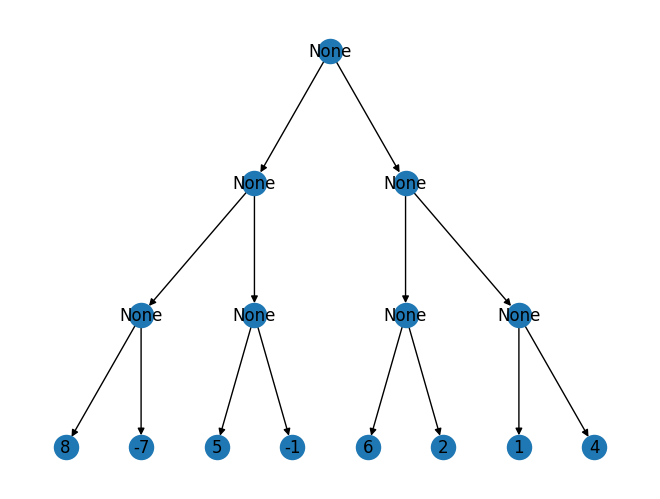

In [4]:
#funcao que printa o grafo
def print_grafo(graph,labels_dic,values=False):

  #parametros e entrada
  ######
  #list_edges deve ser uma lista de tuplas
  #list_edges = [(1,2),(3,4)....]
  #Cada edge representa uma ligacao entre nós
  #values (default False) é se quer imprimir o grafo com os nomes dos nós ou com seus valores atribuidos
  ######
  #labels_dic é um dicionário com o peso de cada nó
  #labels_dic = {1:4,2:2,3:5,....}

  #cria o node
  G = nx.DiGraph()

  #insere os nós e os edges
  G.add_edges_from(graph)

  #gera a posicao e organiza em arvore
  pos = graphviz_layout(G, prog="dot")

  for node in G:
    G.nodes[node]["value"] = labels_dic[node]

  # Printa a informacao do grafo (opcional)
  print("Nodes:", G.nodes(data=True))
  print("Edges:", G.edges())

  #faz plot
  if values:
    nx.draw(G, pos,with_labels=True,labels=labels_dic)
  else:
    nx.draw(G,pos,with_labels=True)

  plt.draw()
  plt.show()

  return G


G = print_grafo(tree_graph,labels_dic,True)

## Exercício 2:

Agora ja tem um bom grafo para trabalhar com minimax. crie uma função que receba como parâmetro o grafo que você criou acima, nó alvo e qual comportamento de jogador esse nó deve ter (max ou min). Sua função deve retornar qual jogada o jogador deve fazer logo a seguir o nó alvo.

In [5]:
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges())

Nodes: [(0, {'value': None}), (1, {'value': None}), (2, {'value': None}), (3, {'value': 8}), (4, {'value': -7}), (5, {'value': None}), (6, {'value': 5}), (7, {'value': -1}), (8, {'value': None}), (9, {'value': None}), (10, {'value': 6}), (11, {'value': 2}), (12, {'value': None}), (13, {'value': 1}), (14, {'value': 4})]
Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]


In [6]:
def minimax(G, n, player='maxplayer'):

    #recebe como parâmetro:
    #G = Grafo
    #n = nó analisado
    #player = caracteristica do player naquele nó


    def _minimax(G, n, player):
        # Vai descendo os nós até achar um value
        if G.nodes[n]["value"]!=None:
            return G.nodes[n]["value"]


        if player == 'maxplayer':
            #funcao player max
            #imaginando um valor muito baixo
            bestv = float("-inf")
            #para cada filho
            for child in G.successors(n):
                #pega o valor contido no nó
                v = _minimax(G, child, 'minplayer')
                #fica com o maior numero
                bestv = max(bestv, v)
                print(f'Entrou no max eo valor analisado é {child,v}')

            print(f'No final ele optou por {bestv}')

        else:
            #funcao player min
            #imaginando um valor muito alto
            bestv = float("inf")
            #para cada filho
            for child in G.successors(n):
                #pega o valor contido no nó
                v = _minimax(G, child, 'maxplayer')
                #fica com o menor numero
                bestv = min(bestv, v)
                print(f'Entrou no min eo valor analisado é {child,v}')

            print(f'No final ele optou por {bestv}')


        return bestv

    #inicia no nó foco e se expande para os nós seguintes com base na caracteristica do player

    if player=='maxplayer':

      #inicia as variaveis de saida
      #melhor movimento
      best_move = None
      #melhor numero numero muito pequeno
      bestv = float("-inf")


      #para cada sucessor do nó de caracteristica maxima aplica-se um min
      for child in G.successors(n):
          print()
          print(f"Nó filho analisado: {child}")
          #minplayer
          v = _minimax(G, child, 'minplayer')
          #se é um max portanto ele quer ficar com o valor maior
          if v > bestv:
              best_move = child
              bestv = v

    else:


      #melhor movimento
      best_move = None
      #melhor numero numero muito grande
      bestv = float("inf")

      #para cada sucessor do nó de caracteristica minima aplica-se um max
      for child in G.successors(n):
          print()
          print(f"Nó filho analisado: {child}")

          v = _minimax(G, child, 'maxplayer')
          if v < bestv:

              best_move = child
              bestv = v
              print(f"até o momento({best_move,bestv})")


    return (best_move, bestv)

In [7]:
minimax(G, 0,'maxplayer')


Nó filho analisado: 1
Entrou no max eo valor analisado é (3, 8)
Entrou no max eo valor analisado é (4, -7)
No final ele optou por 8
Entrou no min eo valor analisado é (2, 8)
Entrou no max eo valor analisado é (6, 5)
Entrou no max eo valor analisado é (7, -1)
No final ele optou por 5
Entrou no min eo valor analisado é (5, 5)
No final ele optou por 5

Nó filho analisado: 8
Entrou no max eo valor analisado é (10, 6)
Entrou no max eo valor analisado é (11, 2)
No final ele optou por 6
Entrou no min eo valor analisado é (9, 6)
Entrou no max eo valor analisado é (13, 1)
Entrou no max eo valor analisado é (14, 4)
No final ele optou por 4
Entrou no min eo valor analisado é (12, 4)
No final ele optou por 4


(1, 5)

## Exercício 3:

Que melhoria você propoe para o seu codigo acima? Discuta isso com o professor e veja sobre Alpha Beta Pruning. Implemente a rotina no seu código acima. O valor muda? O que muda?

In [8]:
def minimax_alfa(G, n, player='maxplayer'):

    def _minimax(G, n, player, alpha, beta):
        #vai abrindo os valores dos nós até chegar na base
        if G.nodes[n]["value"]!=None:
            return G.nodes[n]["value"]


        if player == 'maxplayer':
            #maximizador
            #atualiza o alfa
            bestv = float("-inf")
            for child in G.successors(n):
                v = _minimax(G, child, 'minplayer', alpha, beta)
                bestv = max(bestv, v)
                alpha = max(alpha, bestv)
                print(f'Entrou no min eo valor analisado é {child,v}')
                if beta <= alpha:
                    print(">>>>>>aplicou poda")
                    break


            print(f'No final ele optou por {bestv}')

            return bestv
        else:
            #minimizador
            #atualiza o beta
            bestv = float("inf")
            for child in G.successors(n):
                v = _minimax(G, child, 'maxplayer', alpha, beta)
                bestv = min(bestv, v)
                beta = min(beta, bestv)
                print(f'Entrou no min eo valor analisado é {child,v}')
                if beta <= alpha:
                    print(">>>>>>aplicou poda")
                    break


            print(f'No final ele optou por {bestv}')

            return bestv


    #se maxplayer
    if player == 'maxplayer':
        #inicia os valores
        best_move = None
        bestv = float("-inf")
        alpha = float("-inf")
        beta = float("inf")

        #para cada sucessor do nó alvo
        for child in G.successors(n):

            print()
            print(f"Nó filho analisado: {child}")

            #recebe v dos filhos
            v = _minimax(G, child, 'minplayer', alpha, beta)
            #se para o caso de max vai salvando os maiores

            if v > bestv:
                best_move = child
                bestv = v
                #além disso mantem no alfa o maior
                alpha = max(alpha, bestv)
    else:
        #inicia os valores
        best_move = None
        bestv = float("inf")
        alpha = float("-inf")
        beta = float("inf")

        #para cada sucessor do nó alvo
        for child in G.successors(n):

            print()
            print(f"Nó filho analisado: {child}")

            v = _minimax(G, child, 'maxplayer', alpha, beta)
            if v < bestv:
                best_move = child
                bestv = v
                beta = min(beta, bestv)

    return (best_move, bestv)

In [9]:
minimax_alfa(G, 0,'maxplayer')


Nó filho analisado: 1
Entrou no min eo valor analisado é (3, 8)
Entrou no min eo valor analisado é (4, -7)
No final ele optou por 8
Entrou no min eo valor analisado é (2, 8)
Entrou no min eo valor analisado é (6, 5)
Entrou no min eo valor analisado é (7, -1)
No final ele optou por 5
Entrou no min eo valor analisado é (5, 5)
No final ele optou por 5

Nó filho analisado: 8
Entrou no min eo valor analisado é (10, 6)
Entrou no min eo valor analisado é (11, 2)
No final ele optou por 6
Entrou no min eo valor analisado é (9, 6)
Entrou no min eo valor analisado é (13, 1)
Entrou no min eo valor analisado é (14, 4)
No final ele optou por 4
Entrou no min eo valor analisado é (12, 4)
>>>>>>aplicou poda
No final ele optou por 4


(1, 5)